In [1]:
# to setup Google's TPU
import tensorflow as tf
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)


INFO:tensorflow:Initializing the TPU system: grpc://10.74.188.250:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.74.188.250:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
from gensim import models
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Embedding
from tensorflow.python.keras.layers.recurrent import LSTM
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import collections
import re
import string


In [3]:
# connect to google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
downloaded = drive.CreateFile({'id':'102w6HeY7gr1jYu150092UrO18LvZNFe7'}) 
downloaded.GetContentFile('Eluvio_DS_Challenge.csv') 

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 44, in autodetect
    from . import file_cache
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    "file_cach

In [5]:
import pandas as pd
df=pd.read_csv("Eluvio_DS_Challenge.csv")
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [7]:
df = df.drop("category", axis = 1)
df = df.drop("down_votes", axis = 1)
df = df.drop("time_created", axis = 1)
df = df.drop("date_created", axis = 1)
df = df.drop("over_18", axis=1)
df= df.drop("author", axis=1)

df.head()

,up_votes,title
0,3,Scores killed in Pakistan clashes
1,2,Japan resumes refuelling mission
2,3,US presses Egypt on Gaza border
3,1,Jump-start economy: Give health care to all
4,4,Council of Europe bashes EU&UN terror blacklist


In [8]:
thre = np.quantile(df['up_votes'], 0.8)
y = [1 if i > thre else 0 for i in df['up_votes']]
y = np.array(y)

In [9]:
data=df

In [10]:
data["label"]=y
data.head()

,up_votes,title,label
0,3,Scores killed in Pakistan clashes,0
1,2,Japan resumes refuelling mission,0
2,3,US presses Egypt on Gaza border,0
3,1,Jump-start economy: Give health care to all,0
4,4,Council of Europe bashes EU&UN terror blacklist,0


In [11]:
# We need to pass our model a two-dimensional output vector. For that, we add two one hot encoded columns to our data frame.
pos = []
neg = []
for l in y:
    if l == 0:
        pos.append(0)
        neg.append(1)
    elif l == 1:
        pos.append(1)
        neg.append(0)

In [12]:

data['Pos']= pos
data['Neg']= neg

In [13]:
def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

data['Text_Clean'] = data['title'].apply(lambda x: remove_punct(x))

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# In the next step, we tokenize the titles by using NLTK’s word_tokenize.
from nltk import word_tokenize, WordNetLemmatizer
tokens = [word_tokenize(sen) for sen in data.Text_Clean]

In [16]:
# lower casing the titles 
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# stopwords are removed using NLTK's stopwords
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

In [19]:
def remove_stop_words(tokens):
    return [word for word in tokens if word not in stoplist]

In [20]:
filtered_words = [remove_stop_words(sen) for sen in lower_tokens]


In [21]:
result = [' '.join(sen) for sen in filtered_words]

In [22]:
data['Text_Final'] = result
data['tokens'] = filtered_words
data = data[['Text_Final', 'tokens', 'label', 'Pos', 'Neg']]

In [23]:
data[:4]

,Text_Final,tokens,label,Pos,Neg
0,scores killed pakistan clashes,"[scores, killed, pakistan, clashes]",0,0,1
1,japan resumes refuelling mission,"[japan, resumes, refuelling, mission]",0,0,1
2,us presses egypt gaza border,"[us, presses, egypt, gaza, border]",0,0,1
3,jumpstart economy give health care,"[jumpstart, economy, give, health, care]",0,0,1


In [24]:
# Now we split our data set into train and test.
# We will use 90 % data for training and 10 % for testing. 
# We use random state so every time we get the same training and testing data
data_train, data_test = train_test_split(data, test_size=0.10, random_state=42)

In [25]:
# we build training vocabulary and get maximum training sentence length and total number of words training data.
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

4682015 words total, with a vocabulary size of 110877
Max sentence length is 43


In [26]:
# Then we build testing vocabulary and get maximum testing sentence length and total number of words in testing data.
all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

519480 words total, with a vocabulary size of 38233
Max sentence length is 40


In [27]:
# Downloadind and loading the Google News Word2Vec model
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-04-19 19:33:09--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.88.69
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.88.69|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [28]:
word2vec = models.KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [29]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [30]:
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)

In [31]:
# Each word is assigned an integer and that integer is placed in a list.
# As all the training sentences must have same input shape we pad the sentences.
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 110874 unique tokens.


In [32]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 300

In [33]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [34]:
# Now we will get embeddings from Google News Word2Vec model and save them corresponding to the sequence number we assigned to each word.
# If we could not get embeddings we save a random vector for that word.
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(110875, 300)


In [35]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [36]:
label_names = ['Pos', 'Neg']

In [37]:
y_train = data_train[label_names].values

In [38]:
x_train = train_cnn_data
y_tr = y_train

In [49]:
# Defining RNN 
# embedding matrix is passed to embedding layer and its output is fed to LSTM layer which has 256 LSTM cells
def recurrent_nn(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

#     lstm = LSTM(256, dropout=0.5, recurrent_dropout=0.2, return_sequences=True)(embedded_sequences)
    lstm = LSTM(256,dropout=0.5)(embedded_sequences)
    
    x = Dense(128, activation='relu')(lstm)
    x = Dropout(0.5)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [50]:
# executing the model in Google's TPU
with strategy.scope():
  model = recurrent_nn(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 50, 300)           33262500  
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               570368    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 258       
Total params: 33,866,022
Trainable params: 603,522
Non-trainable params: 33,262,500
_________________________________________

In [60]:
num_epochs = 5
batch_size = 32

In [52]:
# Training the model
history = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/5
12890/12890 [==============================] - 259s 20ms/step - loss: 0.4816 - acc: 0.8037 - val_loss: 0.4651 - val_acc: 0.8059
Epoch 2/5
12890/12890 [==============================] - 251s 19ms/step - loss: 0.4654 - acc: 0.8050 - val_loss: 0.4563 - val_acc: 0.8063
Epoch 3/5
12890/12890 [==============================] - 254s 20ms/step - loss: 0.4608 - acc: 0.8047 - val_loss: 0.4569 - val_acc: 0.8067
Epoch 4/5
12890/12890 [==============================] - 254s 20ms/step - loss: 0.4557 - acc: 0.8061 - val_loss: 0.4585 - val_acc: 0.8065
Epoch 5/5
12890/12890 [==============================] - 256s 20ms/step - loss: 0.4531 - acc: 0.8072 - val_loss: 0.4540 - val_acc: 0.8068


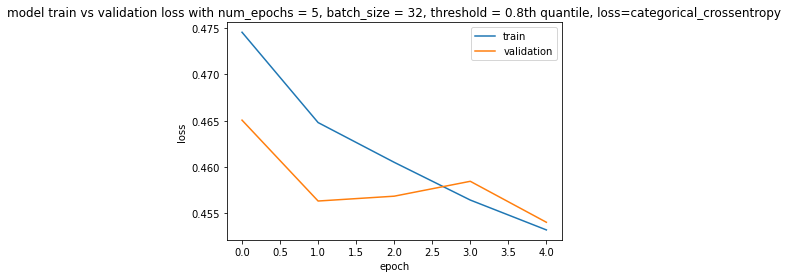

In [53]:
#plot to review the training
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss with num_epochs = 5, batch_size = 32, threshold = 0.8th quantile, loss=categorical_crossentropy')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [54]:
#  for saving the model
!mkdir -p saved_model_ultimate
model.save('my_model_ultimate.h5')

Uncomment the below cell to load my pre-trained model.

In [ ]:
# # Recreate the exact same model, including its weights and the optimizer
# new_model = tf.keras.models.load_model('my_model_ultimate.h5')

# # Show the model architecture
# new_model.summary()

In [55]:
predictions = model.predict(test_cnn_data, batch_size=1024, verbose=1)

50/50 [==============================] - 3s 33ms/step


In [56]:
labels = [1, 0]

In [57]:
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

In [58]:
sum(data_test.label==prediction_labels)/len(prediction_labels)

0.8049642604665777

# Conclusion

I've tried a few different hyperparameters and trained the models (whose plots are in screenshots folder) but this is the best so far. The fact that deep learning only performs as good as sklearn classifiers is becuase of the skewness of the number of up_votes. There are a lot of records which are lower than 0.8th quantile(0.8 value is found to be best after a few hit and trails) of up_votes and this makes the model to overfit on the training dataset. I've increased the dropout to 0.5 from the usual 0.2 value to decrease the overfitting. 

The up_vote values are right skewed (as shown below) which makes the model to over fit. The model can be further improved by applying normal or uniform distribution to make it as a gaussian curve and train them to have a better model and accuracy.

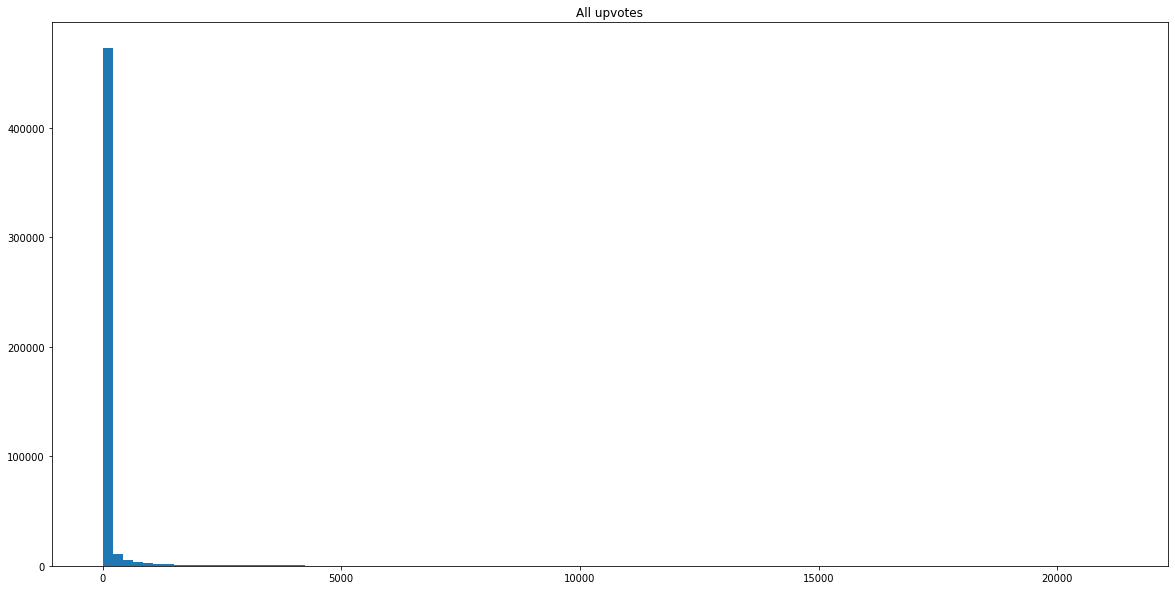

In [10]:
plt.hist(df['up_votes'], bins=100)
plt.title('All upvotes')
plt.show()
